In [1]:
# Import all the necessary modules
# Iinitializing all required libraries for the lab
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy import stats 
from scipy.stats import zscore

%matplotlib inline

Attribute Information:

date time year-month-day hour:minute:second 
Appliances, energy use in Wh 
lights, energy use of light fixtures in the house in Wh 
T1, Temperature in kitchen area, in Celsius 
RH_1, Humidity in kitchen area, in % 
T2, Temperature in living room area, in Celsius 
RH_2, Humidity in living room area, in % 
T3, Temperature in laundry room area 
RH_3, Humidity in laundry room area, in % 
T4, Temperature in office room, in Celsius 
RH_4, Humidity in office room, in % 
T5, Temperature in bathroom, in Celsius 
RH_5, Humidity in bathroom, in % 
T6, Temperature outside the building (north side), in Celsius 
RH_6, Humidity outside the building (north side), in % 
T7, Temperature in ironing room , in Celsius 
RH_7, Humidity in ironing room, in % 
T8, Temperature in teenager room 2, in Celsius 
RH_8, Humidity in teenager room 2, in % 
T9, Temperature in parents room, in Celsius 
RH_9, Humidity in parents room, in % 
To, Temperature outside (from Chievres weather station), in Celsius 
Pressure (from Chievres weather station), in mm Hg 
RH_out, Humidity outside (from Chievres weather station), in % 
Wind speed (from Chievres weather station), in m/s 
Visibility (from Chievres weather station), in km 
Tdewpoint (from Chievres weather station), Â°C 
rv1, Random variable 1, nondimensional 
rv2, Random variable 2, nondimensional 

Where indicated, hourly data (then interpolated) from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis, rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of weather data.

In [29]:
#Loading the data 
egy_df=pd.read_csv('/home/arun/Desktop/PGP-AIML/Trails/Energy/energydata_complete.csv')

In [4]:
#Loading the data 
egy_df=pd.read_csv('/home/arun/Desktop/PGP-AIML/Trails/Energy/energydata_complete.csv')
egy_df.sample(n=5)
egy_df.dtypes
egy_df.shape
egy_df.describe().transpose()


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
5697,2016-02-20 06:30:00,50,0,19.10,38.626667,17.50,40.500000,20.600000,37.900000,17.700000,...,17.700000,42.700000,6.750000,753.850000,94.000000,9.000000,46.000000,5.850000,29.086883,29.086883
17021,2016-05-08 21:50:00,60,0,24.70,38.633333,24.10,36.060000,26.000000,37.026667,24.890000,...,23.128571,39.398571,20.200000,751.233333,45.333333,4.000000,40.000000,7.966667,43.102929,43.102929
5858,2016-02-21 09:20:00,30,0,20.70,44.700000,19.39,45.156667,21.642857,41.895714,19.426667,...,18.290000,47.200000,10.600000,756.566667,89.333333,8.666667,36.333333,8.866667,6.060600,6.060600
4979,2016-02-15 06:50:00,30,10,19.60,40.900000,17.79,41.790000,20.356667,40.590000,18.500000,...,17.790000,44.290000,2.333333,753.816667,82.000000,6.833333,40.000000,-0.416667,18.468206,18.468206
16034,2016-05-02 01:20:00,50,0,21.89,35.590000,19.00,37.433333,22.200000,35.730000,20.700000,...,19.600000,38.966667,4.900000,765.866667,77.666667,1.000000,40.000000,1.233333,0.642833,0.642833


date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

(19735, 29)

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.0,97.694958,102.524891,10.000000,50.000000,60.000000,100.000000,1080.000000
lights,19735.0,3.801875,7.935988,0.000000,0.000000,0.000000,0.000000,70.000000
T1,19735.0,21.686571,1.606066,16.790000,20.760000,21.600000,22.600000,26.260000
RH_1,19735.0,40.259739,3.979299,27.023333,37.333333,39.656667,43.066667,63.360000
T2,19735.0,20.341219,2.192974,16.100000,18.790000,20.000000,21.500000,29.856667
RH_2,19735.0,40.420420,4.069813,20.463333,37.900000,40.500000,43.260000,56.026667
T3,19735.0,22.267611,2.006111,17.200000,20.790000,22.100000,23.290000,29.236000
RH_3,19735.0,39.242500,3.254576,28.766667,36.900000,38.530000,41.760000,50.163333
T4,19735.0,20.855335,2.042884,15.100000,19.530000,20.666667,22.100000,26.200000
RH_4,19735.0,39.026904,4.341321,27.660000,35.530000,38.400000,42.156667,51.090000


In [30]:
egy_df_corr=egy_df.drop(['date','Appliances','lights'],axis=1)
egy_df_corr

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,...,17.033333,45.530000,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,...,17.066667,45.560000,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,...,17.000000,45.500000,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,...,17.000000,45.400000,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,...,17.000000,45.400000,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
5,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,45.730000,17.133333,55.030000,...,17.000000,45.290000,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484
6,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,45.790000,17.100000,54.966667,...,17.000000,45.290000,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763
7,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,45.863333,17.100000,54.900000,...,17.000000,45.290000,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890
8,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,45.790000,17.166667,55.000000,...,17.000000,45.290000,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702
9,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,46.096667,17.100000,55.000000,...,17.000000,45.290000,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314


In [ ]:
# Checking for Missing values and data quality. 

def check_missing_values(df):
    print ("The dataframe df has missing values:",df.isnull().values.any())
    print ("\nColumnwise Sum:", df.isnull().sum())
    # Finding any column has zero value
    print("\n The dataframe has NA:", df.isna().values.any())
    print("\n The dataframe has Not Null rows:",df.notnull().sum())
    return ()

check_missing_values(egy_df)


 The correlation of all variables are as follows:                    T1      RH_1        T2      RH_2        T3      RH_3  \
T1           1.000000  0.164006  0.836834 -0.002509  0.892402 -0.028550   
RH_1         0.164006  1.000000  0.269839  0.797535  0.253230  0.844677   
T2           0.836834  0.269839  1.000000 -0.165610  0.735245  0.121497   
RH_2        -0.002509  0.797535 -0.165610  1.000000  0.137319  0.678326   
T3           0.892402  0.253230  0.735245  0.137319  1.000000 -0.011234   
RH_3        -0.028550  0.844677  0.121497  0.678326 -0.011234  1.000000   
T4           0.877001  0.106180  0.762066 -0.047304  0.852778 -0.140457   
RH_4         0.097861  0.880359  0.231563  0.721435  0.122737  0.898978   
T5           0.885247  0.205797  0.720550  0.110409  0.888169 -0.050062   
RH_5        -0.014782  0.303258  0.029595  0.250271 -0.066355  0.375422   
T6           0.654769  0.316141  0.801186 -0.009670  0.686882  0.076833   
RH_6        -0.615045  0.245126 -0.580372  0.3899

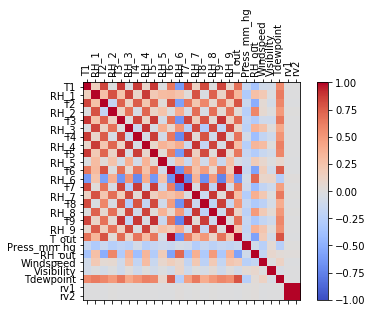

In [31]:
def check_correlations(df): 
    print ("\n The correlation of all variables are as follows:",df.corr())
    corr = df.corr()
    fig = plt.figure(10)
    ax = fig.add_subplot(111)
    cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0,len(df.columns),1)
    ax.set_xticks(ticks)
    plt.xticks(rotation=90)
    ax.set_yticks(ticks)
    ax.set_xticklabels(df.columns)
    ax.set_yticklabels(df.columns)
    plt.show()
    return(corr)

x = check_correlations (egy_df_corr)



In [32]:
x
print (x.iloc[:,:]<0.5)

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
T1,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,0.885247,-0.014782,...,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
RH_1,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,0.205797,0.303258,...,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
T2,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,0.720550,0.029595,...,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
RH_2,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,0.110409,0.250271,...,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
T3,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,0.888169,-0.066355,...,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
RH_3,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,-0.050062,0.375422,...,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
T4,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,0.871813,-0.076489,...,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
RH_4,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,0.091812,0.352591,...,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787
T5,0.885247,0.205797,0.720550,0.110409,0.888169,-0.050062,0.871813,0.091812,1.000000,0.032786,...,0.911055,0.072308,0.651321,-0.170999,-0.273953,-0.145011,-0.084164,0.588362,-0.005490,-0.005490
RH_5,-0.014782,0.303258,0.029595,0.250271,-0.066355,0.375422,-0.076489,0.352591,0.032786,1.000000,...,-0.138509,0.272197,-0.053126,-0.119327,0.185941,0.082044,-0.013133,0.078175,-0.011056,-0.011056


                T1   RH_1     T2   RH_2     T3   RH_3     T4   RH_4     T5  \
T1           False   True  False   True  False   True  False   True  False   
RH_1          True  False   True  False   True  False   True  False   True   
T2           False   True  False   True  False   True  False   True  False   
RH_2          True  False   True  False   True  False   True  False   True   
T3           False   True  False   True  False   True  False   True  False   
RH_3          True  False   True  False   True  False   True  False   True   
T4           False   True  False   True  False   True  False   True  False   
RH_4          True  False   True  False   True  False   True  False   True   
T5           False   True  False   True  False   True  False   True  False   
RH_5          True   True   True   True   True   True   True   True   True   
T6           False   True  False   True  False   True  False   True  False   
RH_6          True   True   True   True   True  False   True   T

In [ ]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Abalone Feature Correlation')
    labels=['Sex','Length','Diam','Height','Whole','Shucked','Viscera','Shell','Rings',]
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

correlation_matrix(egy_df)

In [ ]:
corr=egy_df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [ ]:
sns.pairplot(egy_df, diag_kind = 'kde')

In [6]:
# Dropping date time column. 
egy_df.drop(['date'], axis=1, inplace=True)




KeyError: "['date'] not found in axis"

In [7]:

egy_df=egy_df.apply(zscore)



In [8]:
z = np.abs(stats.zscore(egy_df))
egy_df = egy_df[(z < 3).all(axis=1)]


In [10]:
egy_df.shape

(17344, 28)

In [9]:
#egy_df.columns
X=egy_df.drop(["Appliances","lights"],axis=1)
Y=egy_df[["Appliances","lights"]]

In [10]:
X.shape
Y.shape

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

(17344, 26)

(17344, 2)

In [11]:
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
print(regression_model.intercept_)

[-0.13036047 -0.11334919]


In [13]:
print(regression_model.coef_)

[[ 7.11923693e-03  3.91864960e-01 -2.54838208e-01 -3.41106035e-01
   3.04235217e-01  1.58681484e-01  4.74715200e-02  9.43825875e-03
  -1.06521480e-02  1.44783525e-03  3.29276258e-01  9.37739875e-02
  -5.88608747e-02 -1.67989787e-02  1.88126498e-01 -2.66875141e-01
  -2.41869002e-01 -6.54557931e-02 -2.13084789e-01  6.67463674e-04
   2.71145003e-03  4.83316628e-02  1.28545728e-02  6.13201676e-04
  -1.25167256e-04 -1.25167256e-04]
 [ 1.05020791e-01  2.29746604e-01 -3.01217612e-01 -1.77729142e-01
  -2.78249712e-02 -1.91670003e-02  6.02821375e-01  4.27842011e-01
   2.21644685e-02  3.70959700e-02  1.32952455e-01  6.32089864e-02
  -7.14908104e-02 -6.76528857e-02  1.92360889e-01 -2.70683522e-01
  -5.79266741e-01 -1.59949343e-01 -1.93038960e-01 -5.28658959e-03
   5.48961940e-02  5.35465148e-02  1.06690875e-02  7.43894497e-02
   5.85444755e-03  5.85444755e-03]]


In [14]:
train_model_score = regression_model.score(X_train, Y_train)
test_model_score = regression_model.score(X_test, Y_test)
print ("Training Model Score:",train_model_score)
print ("Test Model Score:",test_model_score)

Training Model Score: 0.18090932546995614
Test Model Score: 0.17577164439907358


In [15]:
Y_predict = regression_model.predict(X_test)
from sklearn import metrics
#Printing value of MAE 
print(metrics.mean_absolute_error(Y_test,Y_predict))
#printing the value of MSE 
print(metrics.mean_squared_error (Y_test,Y_predict))
#printing the value of RMSE 
print(np.sqrt(metrics.mean_squared_error (Y_test,Y_predict)))

0.42240176930582873
0.41736374881502986
0.6460369562300827
